In [201]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

In [202]:
# Download the stopwords dataset

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Load the dataset**

In [203]:
# Load the dataset
df = pd.read_csv('c:\\Users\\rahul\\Downloads\\spam.csv',encoding='latin-1')

# Display the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [204]:
# Drop unnecessary columns from the DataFrame

columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

# **Exploring the Dataset**

In [205]:
# Displaying the data

df




,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [206]:
# Consice information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [207]:
df.shape

(5572, 2)

In [208]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [209]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [210]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [211]:
# Rename the columns "v1 and "v2" to new names

new_column_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)


In [212]:
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Data Visualisation**

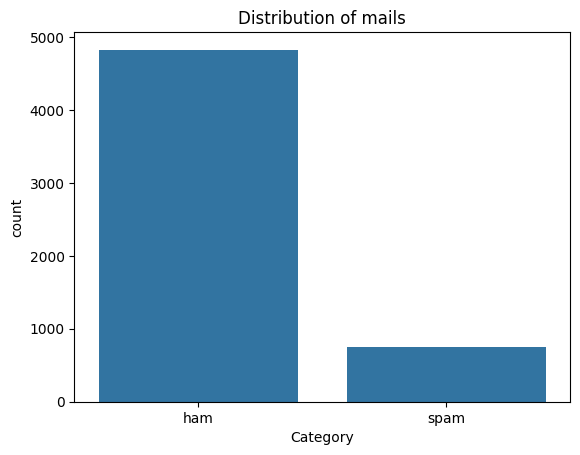

In [213]:
sns.countplot(data=df, x='Category')
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Distribution of mails')
plt.show()

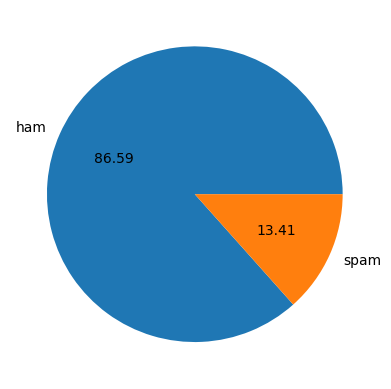

In [214]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

# **Data Preprocessing**

**Label Encoding**

In [215]:
df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [216]:
# Separate the feature (message) and target (category) data

X = df["Message"]
Y = df["Category"]

In [217]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [218]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


**Splitting the data into training data and test data**

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [221]:
# Print the shape of X
print(X.shape)


(5572,)


In [222]:
# Print the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


# **Feature Extraction**

**TF-IDF Vectorizer**

In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [224]:
# Initialize TF-IDF Vectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [225]:
# Feature extraction for training and testing data
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [226]:
# Convert Y_train and Y_test to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")


In [227]:
print(X_train)


3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [228]:
print(X_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34758 stored elements and shape (4457, 7510)>
  Coords	Values
  (0, 4513)	0.2909649098524696
  (0, 3380)	0.21807195185332803
  (0, 3262)	0.25877035357606315
  (0, 3136)	0.440116181574609
  (0, 2122)	0.38613577623520473
  (0, 3386)	0.3219352588930141
  (0, 6599)	0.20296878731699391
  (0, 4296)	0.3891385935794867
  (0, 3979)	0.2410582143632299
  (0, 741)	0.3219352588930141
  (1, 7443)	0.35056971070320353
  (1, 6442)	0.5652509076654626
  (1, 6417)	0.4769136859540388
  (1, 6872)	0.4306015894277422
  (1, 4061)	0.380431198316959
  (2, 5825)	0.4917598465723273
  (2, 2226)	0.413484525934624
  (2, 3917)	0.40088501350982736
  (2, 2109)	0.42972812260098503
  (2, 933)	0.4917598465723273
  (3, 7453)	0.5202633571003087
  (3, 1842)	0.3708680641487708
  (3, 1599)	0.5927091854194291
  (3, 6140)	0.4903863168693604
  (4, 1842)	0.36051481797205776
  :	:
  (4452, 4636)	0.4030918768627523
  (4453, 1762)	0.45610005640082985
  (4453, 7273)	0.578773

# **Model Selection and Training**

**Logistic Regresion**

In [229]:
from sklearn.linear_model import LogisticRegression

In [230]:
# Create and Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_features, Y_train)


LogisticRegression()

**Evaluating the trained model**

In [231]:
 #Make predictions on the training data
predict_train_data=model.predict(X_train_features)

In [232]:
#Model Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_train_data=accuracy_score(Y_train,predict_train_data)
print("Accuracy on training data: ",accuracy_train_data)

Accuracy on training data:  0.9661207089970832


In [233]:
# Make predictions on the testing data
predict_test_data=model.predict(X_test_features)

In [234]:
#Model Evaluation
accuracy_test_data=accuracy_score(Y_test,predict_test_data)
print("acuuracy on test data: ",accuracy_test_data)

acuuracy on test data:  0.9623318385650225


**Test the model with an email messages**


In [235]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=model.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


**Confusion Matrix**

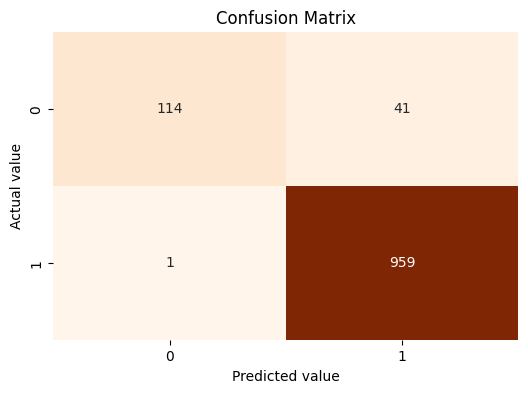

In [236]:
conf_matrix=confusion_matrix(Y_test,predict_test_data)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [237]:
from collections import Counter

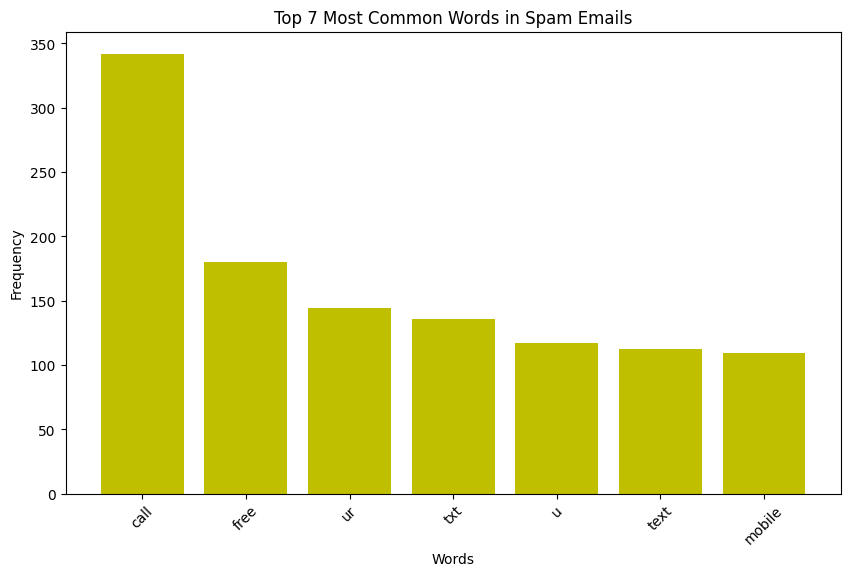

In [238]:
# Data visualization - Top 7 Most Common Words in Spam Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(7)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

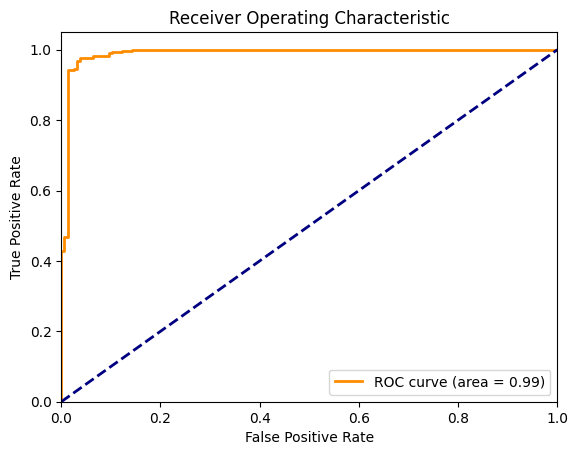

In [239]:
y_test_bin = label_binarize(Y_test, classes=[0, 1])
y_pred_proba = model.predict_proba(X_test_features)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#### Decision Tree

In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [241]:
X_train

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object

In [242]:
from sklearn.tree import export_text

In [243]:
clf = DecisionTreeClassifier()


In [244]:
clf.fit(X_train_features, Y_train)


DecisionTreeClassifier()

In [245]:
y_pred = clf.predict(X_test_features)

In [246]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))


Accuracy: 0.968609865470852
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       155
           1       0.98      0.99      0.98       960

    accuracy                           0.97      1115
   macro avg       0.95      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
 [[131  24]
 [ 11 949]]


In [247]:
tree_rules = export_text(clf, feature_names=feature_extraction.get_feature_names_out())
print(tree_rules)

|--- txt <= 0.05
|   |--- claim <= 0.07
|   |   |--- mobile <= 0.06
|   |   |   |--- www <= 0.07
|   |   |   |   |--- service <= 0.08
|   |   |   |   |   |--- free <= 0.08
|   |   |   |   |   |   |--- landline <= 0.09
|   |   |   |   |   |   |   |--- 150p <= 0.08
|   |   |   |   |   |   |   |   |--- reply <= 0.11
|   |   |   |   |   |   |   |   |   |--- 50 <= 0.09
|   |   |   |   |   |   |   |   |   |   |--- rate <= 0.16
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 56
|   |   |   |   |   |   |   |   |   |   |--- rate >  0.16
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- 50 >  0.09
|   |   |   |   |   |   |   |   |   |   |--- 50 <= 0.21
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- 50 >  0.21
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |--- reply >  0.11
|   |   |   

In [248]:
new_mail=["Congratulations on your recent achievement! Well done."]
new_data_features=feature_extraction.transform(new_mail)
prediction=clf.predict(new_data_features)
print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


In [249]:
from sklearn.tree import plot_tree

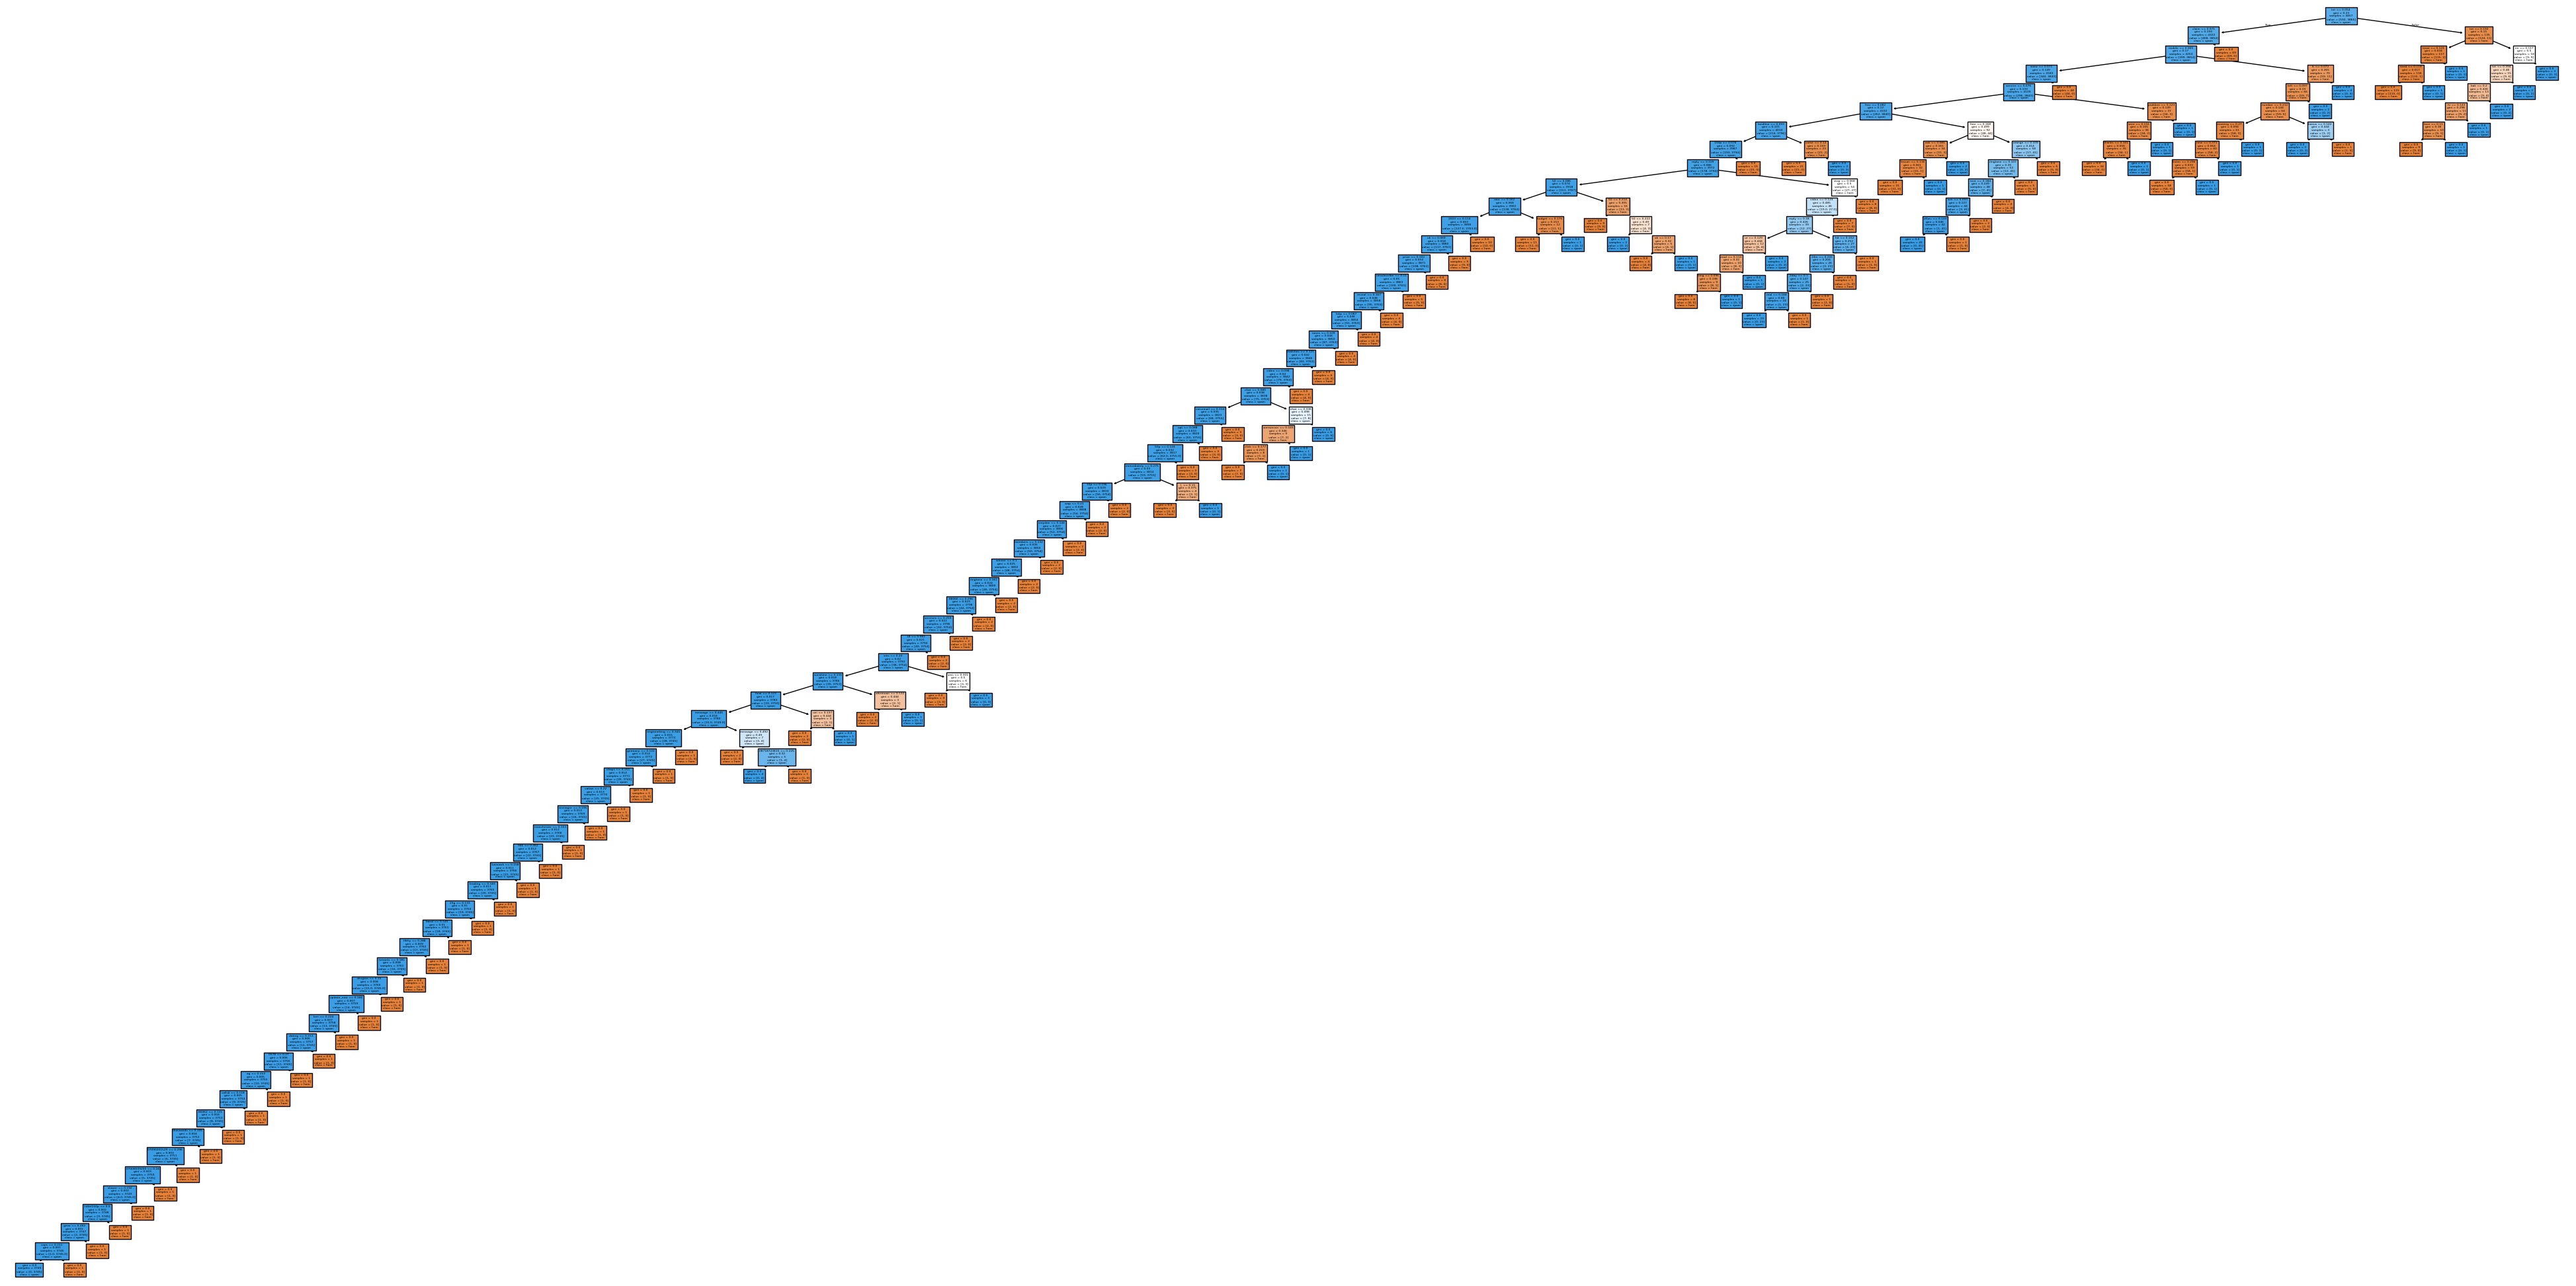

In [250]:
plt.figure(figsize=(50,25))
plot_tree(clf, feature_names=feature_extraction.get_feature_names_out(), class_names=['ham', 'spam'], filled=True)
plt.show()

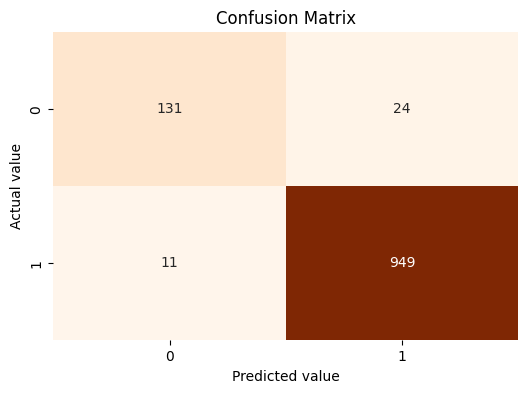

In [251]:
conf_matrix=confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

### Pre pruning

In [252]:
tree_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10)

In [278]:
tree_clf.fit(X_train_features, Y_train)

# Make predictions
y_pred = tree_clf.predict(X_test_features)

# Evaluate the model
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Accuracy: 0.947085201793722
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.67      0.78       155
           1       0.95      0.99      0.97       960

    accuracy                           0.95      1115
   macro avg       0.94      0.83      0.87      1115
weighted avg       0.95      0.95      0.94      1115



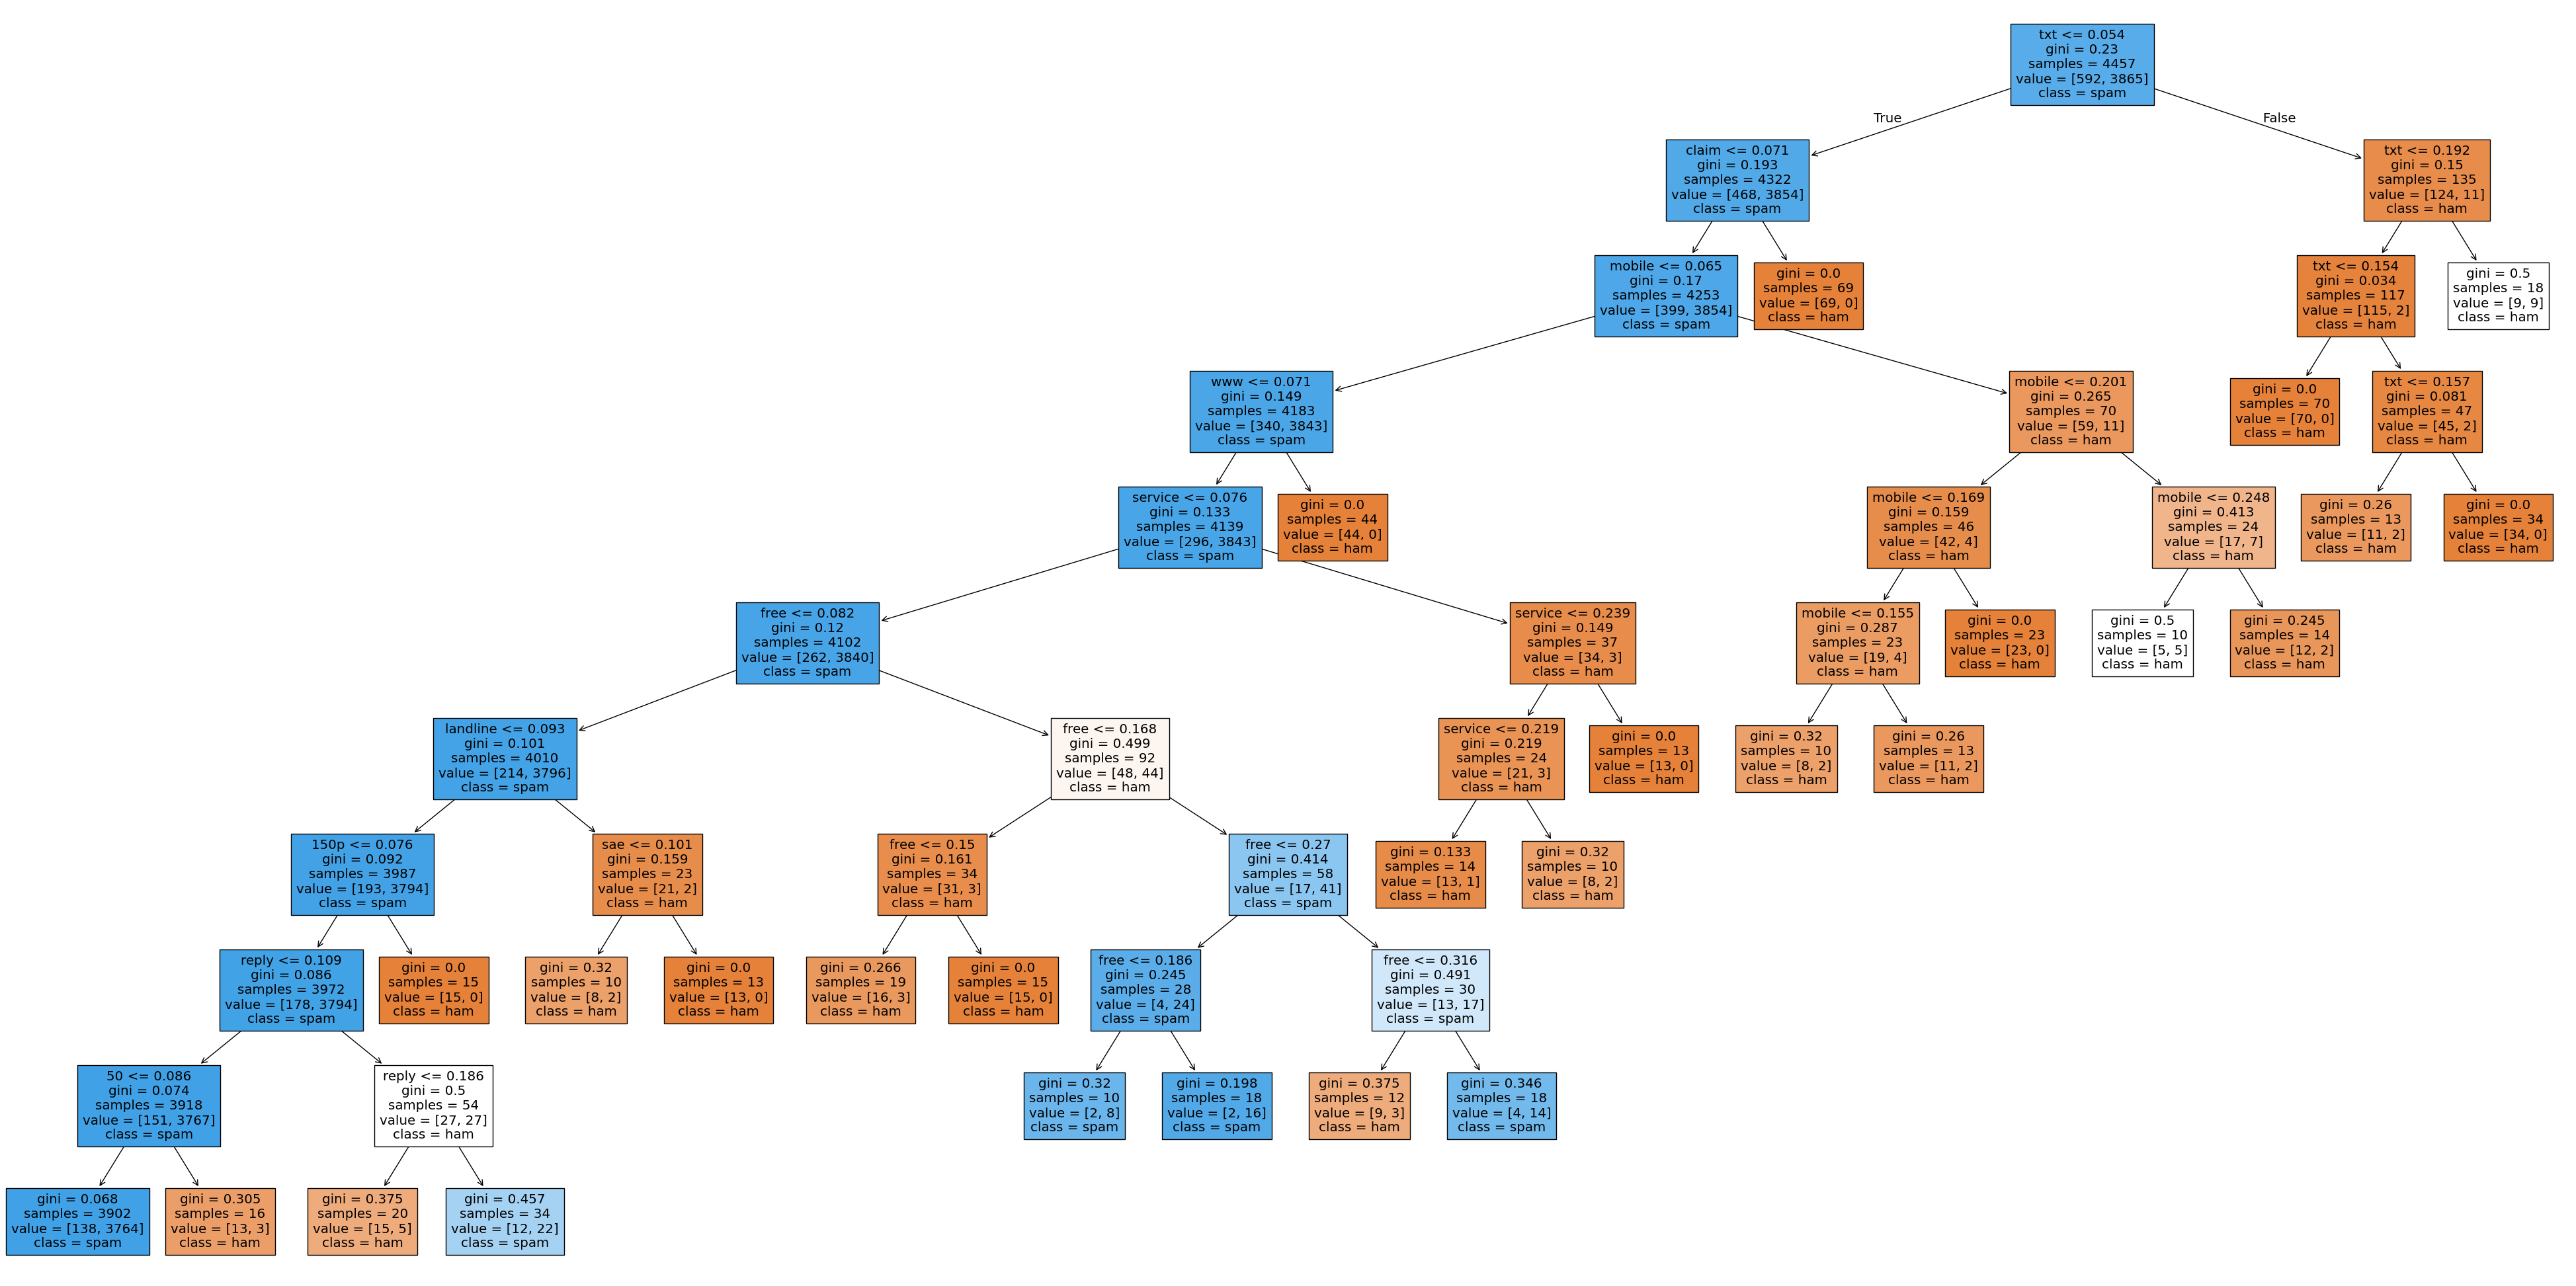

In [254]:
plt.figure(figsize=(50,25))
plot_tree(tree_clf, feature_names=feature_extraction.get_feature_names_out(), class_names=['ham', 'spam'], filled=True)
plt.show()

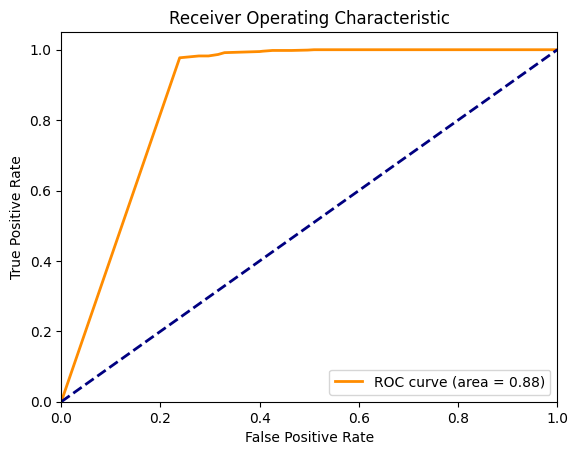

In [256]:
y_test_bin = label_binarize(Y_test, classes=[0, 1])
y_pred_proba = tree_clf.predict_proba(X_test_features)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

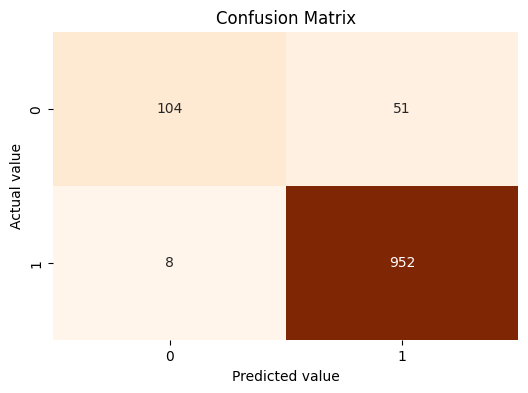

In [257]:
conf_matrix=confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

### KNN


In [258]:
from sklearn.neighbors import KNeighborsClassifier

In [259]:
knn = KNeighborsClassifier()

In [260]:
knn.fit(X_train_features, Y_train)


KNeighborsClassifier()

In [261]:

y_pred = knn.predict(X_test_features)

In [262]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Accuracy: 0.905829596412556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.32      0.49       155
           1       0.90      1.00      0.95       960

    accuracy                           0.91      1115
   macro avg       0.95      0.66      0.72      1115
weighted avg       0.92      0.91      0.88      1115

Confusion Matrix:
 [[ 50 105]
 [  0 960]]


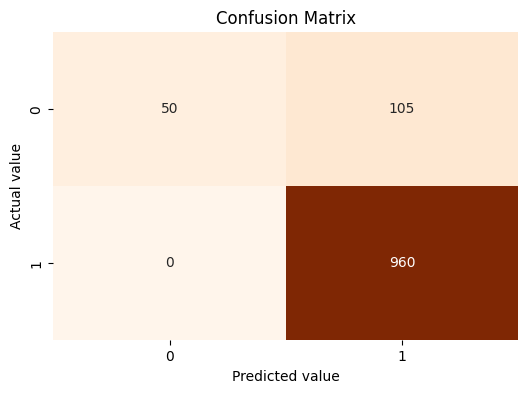

In [263]:
conf_matrix=confusion_matrix(Y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Oranges",cbar=False)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")
plt.show()

In [264]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc

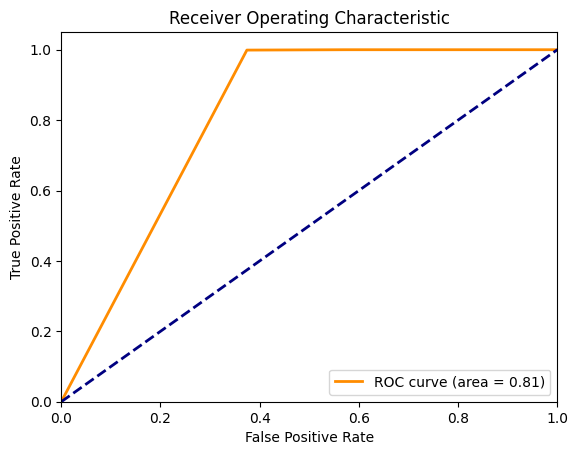

In [265]:
y_test_bin = label_binarize(Y_test, classes=[0, 1])
y_pred_proba = knn.predict_proba(X_test_features)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Test

In [280]:
new_emails = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize.",
    "Dear user, your account has been suspended due to suspicious activity. Please verify your identity.",
    "Important update regarding your recent order from Amazon.",
    "Reminder: Your appointment is scheduled for tomorrow at 3 PM.",
    "You have a new message from your friend on Facebook."
]

X_new = feature_extraction.transform(new_emails)

# Predict whether the new emails are spam or not
predictions = knn.predict(X_new)

# Display the results
for email, prediction in zip(new_emails, predictions):
    print(f"Email: {email}\nPrediction: {'Spam' if prediction else ' Not Spam'}\n")

Email: Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize.
Prediction: Spam

Email: Dear user, your account has been suspended due to suspicious activity. Please verify your identity.
Prediction: Spam

Email: Important update regarding your recent order from Amazon.
Prediction: Spam

Email: Reminder: Your appointment is scheduled for tomorrow at 3 PM.
Prediction: Spam

Email: You have a new message from your friend on Facebook.
Prediction: Spam



In [281]:
new_emails = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize.",
    "Dear user, your account has been suspended due to suspicious activity. Please verify your identity.",
    "Important update regarding your recent order from Amazon.",
    "Reminder: Your appointment is scheduled for tomorrow at 3 PM.",
    "You have a new message from your friend on Facebook."
]

X_new = feature_extraction.transform(new_emails)

# Predict whether the new emails are spam or not
predictions = model.predict(X_new)

# Display the results
for email, prediction in zip(new_emails, predictions):
    print(f"Email: {email}\nPrediction: {'Spam' if prediction else ' Not Spam'}\n")

Email: Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize.
Prediction:  Not Spam

Email: Dear user, your account has been suspended due to suspicious activity. Please verify your identity.
Prediction: Spam

Email: Important update regarding your recent order from Amazon.
Prediction: Spam

Email: Reminder: Your appointment is scheduled for tomorrow at 3 PM.
Prediction: Spam

Email: You have a new message from your friend on Facebook.
Prediction: Spam



In [282]:
new_emails = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize.",
    "Dear user, your account has been suspended due to suspicious activity. Please verify your identity.",
    "Important update regarding your recent order from Amazon.",
    "Reminder: Your appointment is scheduled for tomorrow at 3 PM.",
    "You have a new message from your friend on Facebook."
]

X_new = feature_extraction.transform(new_emails)

# Predict whether the new emails are spam or not
predictions = clf.predict(X_new)

# Display the results
for email, prediction in zip(new_emails, predictions):
    print(f"Email: {email}\nPrediction: {'Spam' if prediction else ' Not Spam'}\n")

Email: Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize.
Prediction:  Not Spam

Email: Dear user, your account has been suspended due to suspicious activity. Please verify your identity.
Prediction: Spam

Email: Important update regarding your recent order from Amazon.
Prediction: Spam

Email: Reminder: Your appointment is scheduled for tomorrow at 3 PM.
Prediction: Spam

Email: You have a new message from your friend on Facebook.
Prediction: Spam



In [283]:
new_emails = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize.",
    "Dear user, your account has been suspended due to suspicious activity. Please verify your identity.",
    "Important update regarding your recent order from Amazon.",
    "Reminder: Your appointment is scheduled for tomorrow at 3 PM.",
    "You have a new message from your friend on Facebook."
]

X_new = feature_extraction.transform(new_emails)

# Predict whether the new emails are spam or not
predictions = tree_clf.predict(X_new)

# Display the results
for email, prediction in zip(new_emails, predictions):
    print(f"Email: {email}\nPrediction: {'Spam' if prediction else ' Not Spam'}\n")

Email: Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize.
Prediction:  Not Spam

Email: Dear user, your account has been suspended due to suspicious activity. Please verify your identity.
Prediction: Spam

Email: Important update regarding your recent order from Amazon.
Prediction: Spam

Email: Reminder: Your appointment is scheduled for tomorrow at 3 PM.
Prediction: Spam

Email: You have a new message from your friend on Facebook.
Prediction: Spam



In [305]:
new_emails = [
    "Dear Customer, your recent purchase of $500 from our store has been confirmed. If you did not make this purchase, please click on the following link to verify your account details and secure your account: http://example.com/secure. Thank you for shopping with us!"
]

X_new = feature_extraction.transform(new_emails)

# Predict whether the new emails are spam or not
predictions = knn.predict(X_new)

# Display the results
for email, prediction in zip(new_emails, predictions):
    print(f"Email: {email}\nPrediction: {'Spam' if prediction==0 else ' Not Spam'}\n")

Email: Dear Customer, your recent purchase of $500 from our store has been confirmed. If you did not make this purchase, please click on the following link to verify your account details and secure your account: http://example.com/secure. Thank you for shopping with us!
Prediction:  Not Spam



In [296]:
new_emails=["Dear User,We are excited to inform you about the latest updates to our service. As a valued customer, you are eligible for a free upgrade to our premium plan. This offer is valid for a limited time only. Click the link below to claim your upgrade: http://example.com/upgrade Best regards, The Service Team Note: If you did not request this email, please ignore this message."]

In [308]:
X_new = feature_extraction.transform(new_emails)

# Predict whether the new emails are spam or not
predictions = model.predict(X_new)

# Display the results
for email, prediction in zip(new_emails, predictions):
    print(f"Email: {email}\nPrediction: {'Spam' if prediction==0 else ' Not Spam'}\n")

Email: Dear Customer, your recent purchase of $500 from our store has been confirmed. If you did not make this purchase, please click on the following link to verify your account details and secure your account: http://example.com/secure. Thank you for shopping with us!
Prediction:  Not Spam



In [302]:
predictions

array([0])

In [301]:
prediction = model.predict(X_new)
prediction_proba = model.predict_proba(X_new)

# Output the result
print(f'Prediction: {prediction[0]}')
print(f'Prediction Probabilities: {prediction_proba}')

Prediction: 0
Prediction Probabilities: [[0.67381165 0.32618835]]
